In [10]:
from scipy.io import arff
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import matplotlib.pyplot as plt 
%matplotlib inline


# Loading the dataset
data = arff.loadarff('Performance.arff')
df = pd.DataFrame(data[0])

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G3
0,b'GP',b'F',18.0,b'U',b'GT3',b'A',4.0,4.0,2.0,2.0,...,b'no',4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0
1,b'GP',b'F',17.0,b'U',b'GT3',b'T',1.0,1.0,1.0,2.0,...,b'no',5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0
2,b'GP',b'F',15.0,b'U',b'LE3',b'T',1.0,1.0,1.0,2.0,...,b'no',4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,12.0
3,b'GP',b'F',15.0,b'U',b'GT3',b'T',4.0,2.0,1.0,3.0,...,b'yes',3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0
4,b'GP',b'F',16.0,b'U',b'GT3',b'T',3.0,3.0,1.0,2.0,...,b'no',4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0


In [11]:
# Viewing the columns present in the dataset
df.columns
# Datatypes of columns present in the dataset
df.dtypes
# General Information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 28 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null float64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null float64
Fedu          649 non-null float64
traveltime    649 non-null float64
studytime     649 non-null float64
failures      649 non-null float64
schoolsup     649 non-null object
famsup        649 non-null object
fatherd       649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null float64
freetime      649 non-null float64
goout         649 non-null float64
Dalc          649 non-null float64
Walc          649 non-null float64
health        649 non-null float64
absences      649 non-null float6

In [12]:
# To perform OneHotEncoder for all Categorical columns
# Categorical columns present in the dataframe
categorical_cols = df.columns[df.dtypes==object].tolist()
categorical_cols

# Performing LabelEncoding for remaining all categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
# Viewing first few rows of data
df[categorical_cols].head(10)

,school,sex,address,famsize,Pstatus,schoolsup,famsup,fatherd,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,1,0,0,0,1,1,0
2,0,0,1,1,1,1,0,0,0,1,1,1,0
3,0,0,1,0,1,0,1,0,1,1,1,1,1
4,0,0,1,0,1,0,1,0,0,1,1,0,0
5,0,1,1,1,1,0,1,0,1,1,1,1,0
6,0,1,1,1,1,0,0,0,0,1,1,1,0
7,0,0,1,0,0,1,1,0,0,1,1,0,0
8,0,1,1,1,0,0,1,0,0,1,1,1,0
9,0,1,1,0,1,0,1,0,1,1,1,1,0


In [13]:
performance_colnames = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu','Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'fatherd', ' activities', 'nursery', 'higher',
'internet', 'romantic', 'famrel', 'freetime', 'goout', ' Dalc', 'Walc ', 'health', 'absences', 'G1', 'G2', 'G3']
df.columns = performance_colnames
df.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18.0,1,0,0,4.0,4.0,2.0,2.0,...,0,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0
1,0,0,17.0,1,0,1,1.0,1.0,1.0,2.0,...,0,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0
2,0,0,15.0,1,1,1,1.0,1.0,1.0,2.0,...,0,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,12.0
3,0,0,15.0,1,0,1,4.0,2.0,1.0,3.0,...,1,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0
4,0,0,16.0,1,0,1,3.0,3.0,1.0,2.0,...,0,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0


In [22]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(20, 28))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(10,5,i)
        plt.plot(df[col],df["G3"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()

28


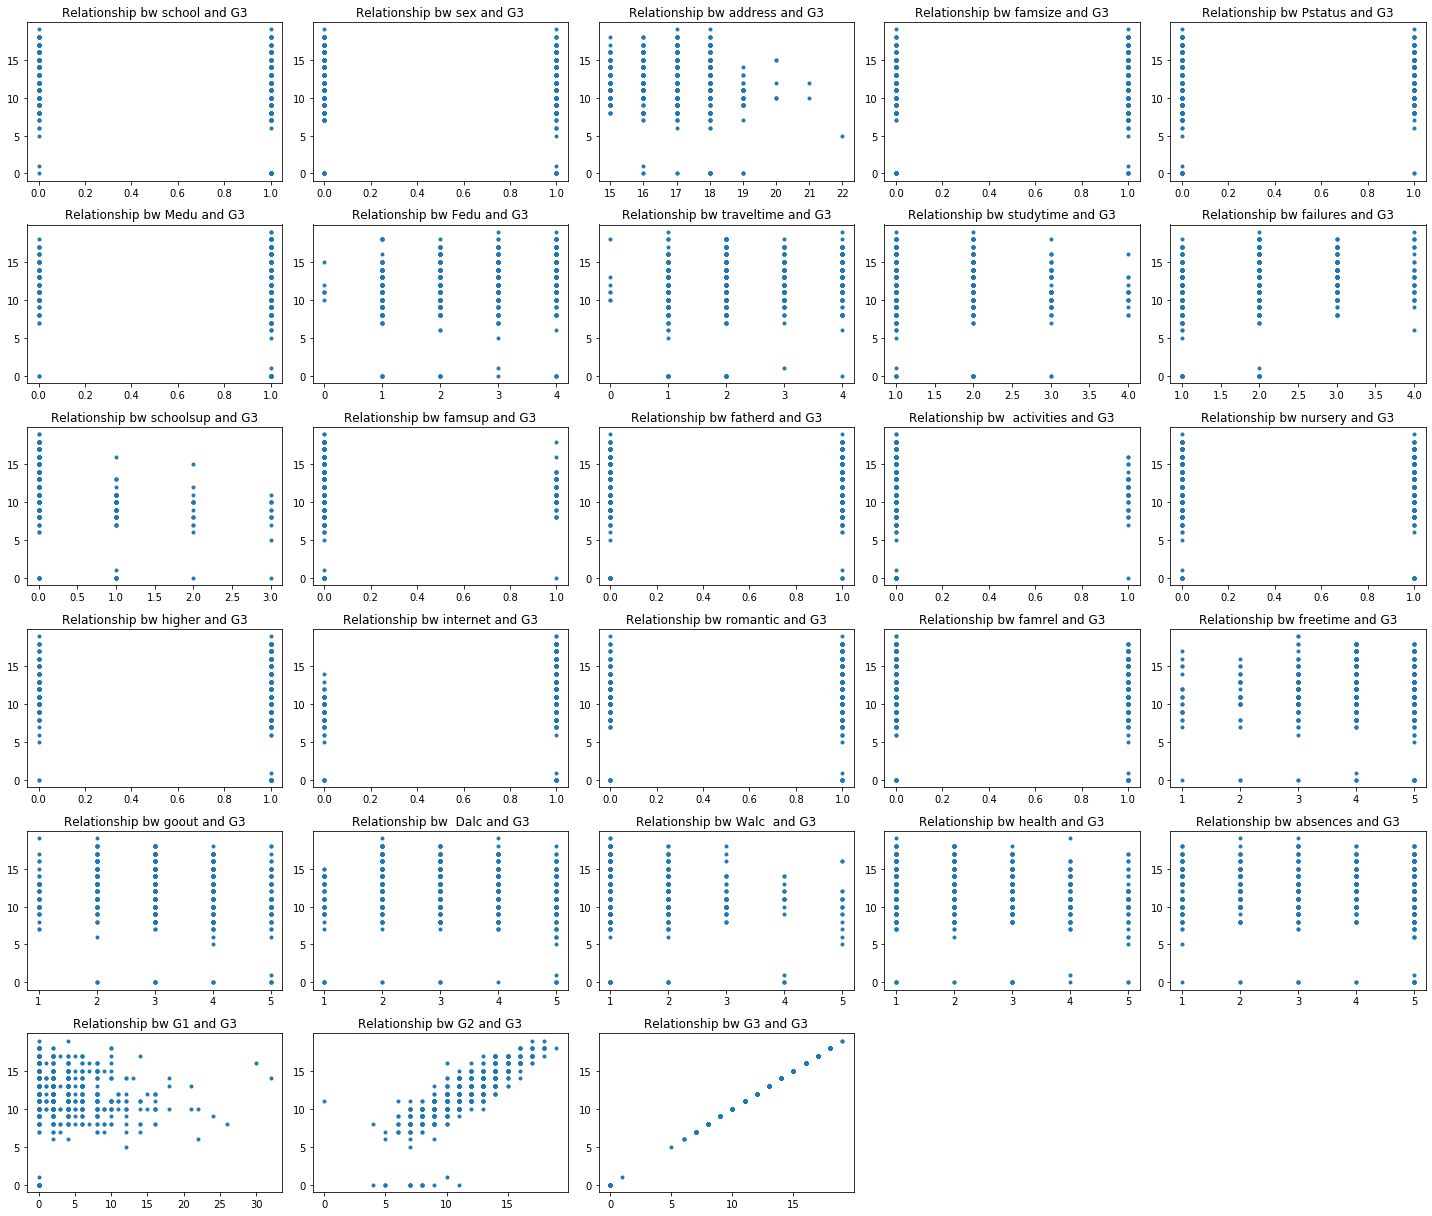

In [23]:
colnames =['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu','Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'fatherd', ' activities', 'nursery', 'higher','internet', 'romantic', 'famrel', 'freetime', 'goout', ' Dalc', 'Walc ', 'health', 'absences', 'G1', 'G2', 'G3']
plotFeatures(colnames,"Relationship bw %s and G3")

In [25]:
def predictPrice(x,theta):
    return np.dot(x,theta)

def calculateCost(x,theta,Y):
    prediction = predictPrice(x,theta)
    return ((prediction - Y)**2).mean()/2

In [29]:
def abline(x,theta,Y):
    """Plot a line from slope and intercept"""
    
    y_vals = predictPrice(x,theta)
    plt.xlim(0, 20)
    plt.ylim(-10, 60)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.gca().set_aspect(0.1, adjustable='datalim')
    plt.plot(x,Y,'.',x, y_vals, '-')
    plt.show()

In [42]:
def gradientDescentLinearRegression(alpha=0.01,iter=5000):
    theta0 = []
    theta1 = []
    costs = []
    predictor = df["G2"]
    x = np.column_stack((np.ones(len(predictor)),predictor))
    Y = df["G3"]
    theta = np.zeros(2)
    for i in range(iter):
        pred = predictPrice(x,theta)
        t0 = theta[0] - alpha *(pred - Y).mean()
        t1 = theta[1] - alpha *((pred - Y)* x[:,1]).mean()
        
        theta = np.array([t0,t1])
        J = calculateCost(x,theta,Y)
        theta0.append(t0)
        theta1.append(t1)
        costs.append(J)
        if i%1000==0:
            print(f"Iteration: {i+1},Cost = {J},theta = {theta}")
            abline(x,theta,Y)
    print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs)}')

Iteration: 1,Cost = 12.646011835149883,theta = [0.11906009 1.43035439]


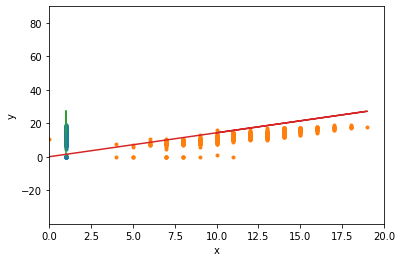

Iteration: 1001,Cost = 1.657150253304906,theta = [0.39413477 1.00786243]


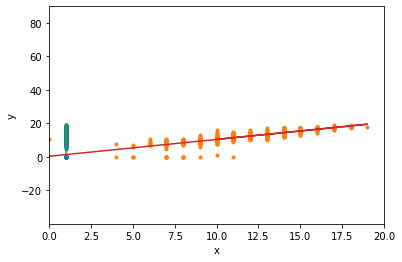

Iteration: 2001,Cost = 1.6538530737755015,theta = [0.57293992 0.99302929]


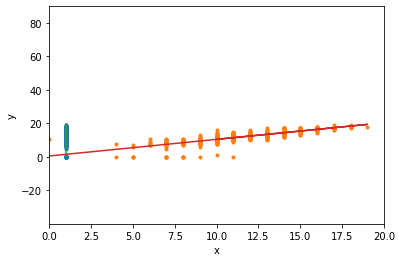

Iteration: 3001,Cost = 1.652741877595258,theta = [0.67674153 0.98441822]


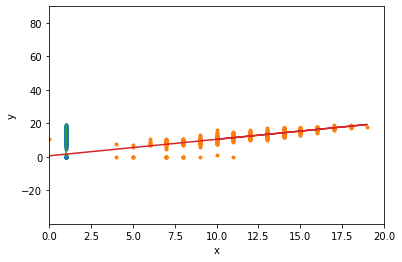

Iteration: 4001,Cost = 1.652367388751088,theta = [0.7370014  0.97941924]


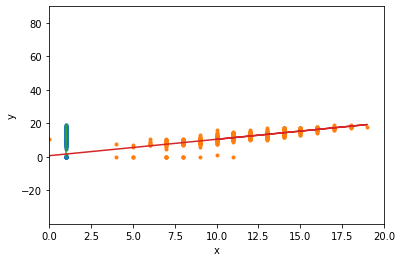

theta0 = 5000
theta1 = 5000
Costs = 5000


In [43]:
gradientDescentLinearRegression()